# **Latang Belakang**

---
California adalah negara bagian terpadat di Amerika Serikat dengan ekonomi terbesar, menjadi pusat pertumbuhan teknologi dan urbanisasi. Kebutuhan akan hunian terus meningkat, terutama dengan naiknya harga properti di berbagai wilayah. Dalam konteks ini, informasi mengenai prediksi harga rumah menjadi sangat penting bagi pengembang properti, investor, maupun masyarakat umum.

Dengan memanfaatkan data dari sensus perumahan California tahun 1990, proyek ini bertujuan membangun model machine learning yang mampu memprediksi harga median rumah berdasarkan karakteristik lingkungan seperti jumlah ruangan, kepadatan penduduk, pendapatan, dan lokasi geografis.

 - Problem Statement



    Bagaimana memprediksi harga median rumah berdasarkan karakteristik wilayah, guna mendukung pengambilan keputusan dalam investasi, pengembangan perumahan, atau strategi harga?

    Fitur yang digunakan:
    | Fitur                | Penjelasan                                                                                              |
    | -------------------- | ------------------------------------------------------------------------------------------------------- |
    | `latitude`           | Garis lintang lokasi rumah                                                                              |
    | `longitude`          | Garis bujur lokasi rumah                                                                                |
    | `housing_median_age` | Umur median dari rumah di daerah tersebut                                                               |
    | `total_rooms`        | Jumlah total ruangan di semua rumah di blok tersebut                                                    |
    | `population`         | Jumlah penduduk di blok tersebut                                                                        |
    | `median_income`      | Pendapatan median penduduk (dalam puluhan ribu dolar AS)                                                |
    | `ocean_proximity`    | Kedekatan lokasi terhadap laut (kategori: `'INLAND'`, `'<1H OCEAN'`, `'NEAR OCEAN'`, `'NEAR BAY'`, dll) |

- ML Objective

    Membangun model regresi yang mampu meminimalkan kesalahan prediksi terhadap nilai harga rumah. Dan untuk melakukan 
    pengukuran performa model menggunakan metrik:

        - MAE (Mean Absolute Error)
        - MAPE (Mean Absolute Percentage Error)
        - R² Score (Koefisien Determinasi)

- Action

    Model ini dikembangkan untuk digunakan dalam konteks berikut:

        Memberikan rekomendasi harga jual dan beli rumah berdasarkan data lingkungan.
        Membantu perencanaan lokasi strategis untuk pengembangan kawasan perumahan baru.
        Menyediakan informasi berbasis data untuk keperluan analisis pasar properti

- Value

    Implementasi model ini memberikan berbagai nilai manfaat:

        Efisiensi pengambilan keputusan bisnis di sektor properti.
        Mengoptimalkan Return on Investment (ROI) bagi investor dan pengembang.
        Mengurangi risiko kesalahan estimasi harga, baik untuk penjual maupun pembeli.

# **Data Preparation**

---

- Importing Libraries
- Importing Dataset & Data General Understanding

## Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt
import matplotlib.image as mpimg
import re
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from sklearn.linear_model import LinearRegression, Lasso, Ridge,BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV,cross_val_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBRFRegressor
from category_encoders import OneHotEncoder,BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import shap
import os
import pickle




##  Importing Dataset & Data General Understanding

In [2]:
df = pd.read_csv("D:\\Modul Purwadhika\\Latihan\\Capstone 3\\data_california_house.csv")
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


Secara garis besar, dapat disimpulkan dari Data Frame yang telah ditunjukkan di atas bahwa:

1. Dataset yang digunakan dalam analisis ini memiliki 10 kolom dan 14448 baris.
2. Kolom `longitude` dan `latitude` merupakan data spasial yang apabila digabungkan akan menunjukkan letak koordinat suatu titik.
3. Kolom `ocean_proximity` merupakan data kategorikal yang membagi data-data yang ada dalam dataset di atas menjadi beberapa kategori bergantung kepada posisi dari koordinat relatif terhadap kedekatan dengan pesisir atau garis pantai.
4. Kolom `housing_median_age`, `total_rooms`, `total_bedrooms`, `households`,`population`, `median_income` dan `median_house_value` adalah data numerikal positif dengan rentang tak terbatas yang menunjukkan atribut masing-masing dari sampel.
5. terdapat missing value pada kolom `total_bedrooms`

In [3]:
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


di sini kita akan melikan Uniqe Value yang terdapat pada setiap column

In [4]:
listData= []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Description', 'Number of Unique Value', 'Unique Value Description'],
                     data=listData)
tabelDesc

,Column Description,Number of Unique Value,Unique Value Description
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


# **Exploratory Data Analysis**
---
**Exploratory Data Analysis** atau **EDA** dilakukan untuk menyelidiki data lebih lanjut serta melihat secara detail gagasan utama atau *insights* yang mungkin terkandung pada data. EDA dapat memberikan pemahaman dasar tentang distribusi data, *missing values*, *data duplicate*, visualisasi beberapa aspek dari data, dan banyak lagi.

### Distribusi/ Sebaran Data House Media Value

C:\Users\UserName\AppData\Local\Temp\ipykernel_22204\724068799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'], kde = True)


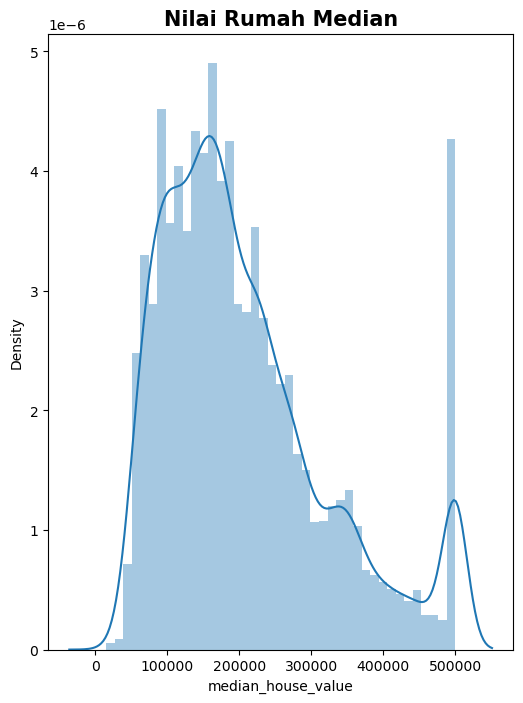

In [5]:
plt.figure(figsize=(6,8))
sns.distplot(df['median_house_value'], kde = True)
plt.title('Nilai Rumah Median', size=15, weight='bold');

Berdasarkan plot distribusi Nilai Rumah Median di atas, terlihat bahwa terdapat 'right-skewed distribution'.dan dapat di lihat bahwa ada nilai yang melebihin dari 500.000 oleh karana itu kita akan melakukan pengecekan terhadapt value dari *Feature media_house_value*

In [6]:
df[ 'median_house_value'].value_counts()

median_house_value
500001.0    678
137500.0     85
162500.0     79
187500.0     70
225000.0     69
           ... 
89900.0       1
50900.0       1
61800.0       1
59900.0       1
403700.0      1
Name: count, Length: 3548, dtype: int64

Dapat kita identifikasi bahwa terdapat nilai 500001 pada kolom median_house_value. Kemungkinan besar nilai ini dicatat sebagai batas atas (cap) untuk harga rumah, sehingga seluruh rumah dengan nilai sebenarnya di atas 500001 dicatat dengan angka tersebut. Hal ini dapat memengaruhi akurasi model karena tidak merepresentasikan nilai sebenarnya. maka dari itu kita akan melakukan penghapusan pada nilai 500001

In [7]:
df.drop(df[df["median_house_value"] == 500001].index, inplace=True)

In [8]:
df[ 'median_house_value'].value_counts()

median_house_value
137500.0    85
162500.0    79
187500.0    70
225000.0    69
112500.0    66
            ..
89900.0      1
50900.0      1
61800.0      1
59900.0      1
403700.0     1
Name: count, Length: 3547, dtype: int64

### Housing Location by Coordinates dan Ocean Proximity

berikut ini kita akan melihat sebaran data value median rumah berdasarkan coordinate dan ocean proximity

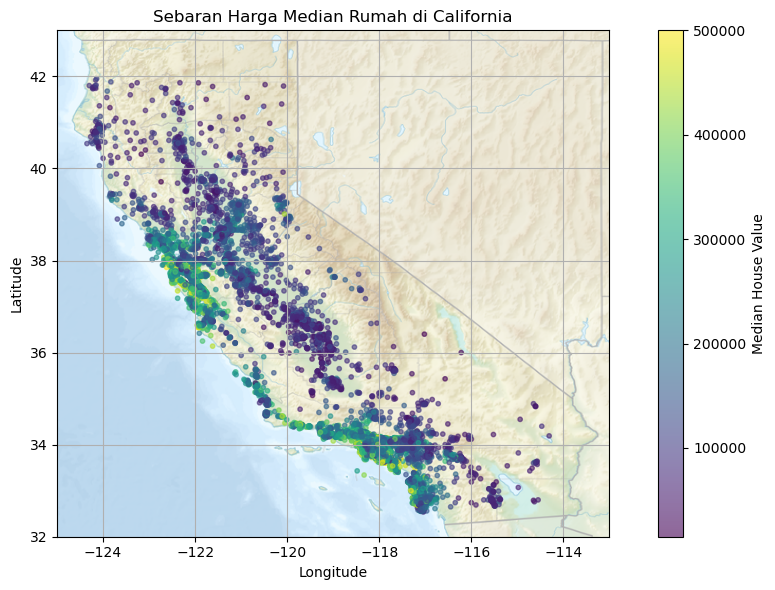

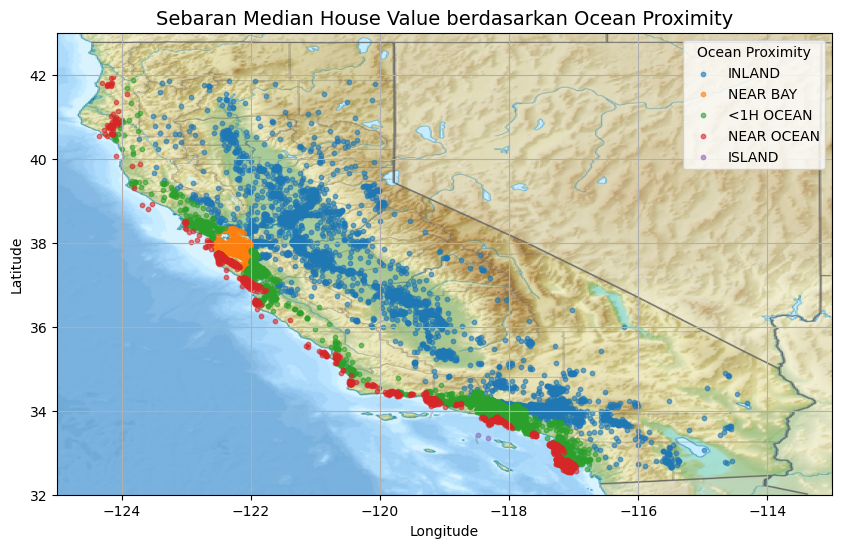

In [9]:
# Siapkan data longitude, latitude, dan harga rumah
lon = df["longitude"]
lat = df["latitude"]
prices = df["median_house_value"]

# (Opsional) Load gambar peta sebagai latar belakang
img = mpimg.imread('map.png') 


plt.figure(figsize=(10, 6))

# (Opsional) Tambahkan gambar peta
plt.imshow(img, extent=[-125, -113, 32, 43], alpha=0.5)

# Scatter plot berdasarkan koordinat
sc = plt.scatter(lon, lat, c=prices, cmap="viridis", s=10, alpha=0.6)

# Tambahkan colorbar dan label
plt.colorbar(sc, label="Median House Value")
plt.title("Sebaran Harga Median Rumah di California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# BY Oceam Proxcimity
# 2. Load background map (pastikan file ada di direktori kerja)
img = mpimg.imread('map.png')  # Ganti nama file bila berbeda

# 3. Setup canvas
fig, ax = plt.subplots(figsize=(10, 6))

# 4. Tampilkan gambar peta (atur extent untuk wilayah California)
ax.imshow(img, extent=[-125, -113, 32, 43], aspect='auto')

# 5. Scatter plot per kategori 'ocean_proximity'
categories = df['ocean_proximity'].unique()
colors = plt.cm.tab10(range(len(categories)))  # Ambil warna berbeda

for i, cat in enumerate(categories):
    subset = df[df['ocean_proximity'] == cat]
    ax.scatter(
        subset['longitude'],
        subset['latitude'],
        s=10,
        alpha=0.6,
        label=cat,
        color=colors[i]
    )

# 6. Tambahkan legend dan label
ax.set_title('Sebaran Median House Value berdasarkan Ocean Proximity', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(title='Ocean Proximity')
plt.grid(True)
plt.show()


### Insight

- Rumah daerah pesisir memiliki value lebih tinggi dari pada di daratan. Hal ini di perngaruhi beberapa factor antara seperti:

        a. Permintaan yang Sangat Tinggi (High Demand), karena daya tarik alami dan di daerah teluk merupakan Pusat Ekonomi dan Pekerjaan Bergaji Tinggi
        b. Penawaran Terbatas
    
    **Source: The Best Coastal Towns in California to Buy a Home** https://www.sammamishmortgage.com/coastal-towns-in-california/
- hanya terdapat 2 data point yang menunjukan kategori island.

###  Missing Values & Duplicate

In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        131
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
df.isna().sum()/df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.951344
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [12]:
print("Jumlah Data Duplicate : ",df.duplicated().sum())

Jumlah Data Duplicate :  0



#### Insight
- Tidak terdapat data duplicate
- kolom `total_bedrooms` terdapat *missing values* sejumlah 137 atau  0.9%  
- terdapat 2 cara untuk : 
    1. drop missing value karena jumlah nya tidak sampai 10% dari data
    2. menggisi dengan iterative imputer dengan KNN atau linier Regresion .

Di sini kita akan lakukan dengan iterative imputer dengan pendekanan linier regresi untuk mendapatkan hasil yang yang lebih akurat

### Impute Missing Value

In [13]:
# Separate the categorical column
KategoriColumn = df[['ocean_proximity']]
NumerikColumn = df.drop(columns=['ocean_proximity'])

# Use KNN imputer to fill missing values in numerical columns
imputer = IterativeImputer(
    estimator=LinearRegression(),  
    random_state=2042)
NumerikColumn_Impute = imputer.fit_transform(NumerikColumn)

# Convert the result back to a DataFrame
NumerikColumn_Impute_df = pd.DataFrame(NumerikColumn_Impute, columns=NumerikColumn.columns)

# Combine the imputed numerical columns with the original categorical column
df = pd.concat([NumerikColumn_Impute_df, KategoriColumn.reset_index(drop=True)], axis=1)

# Verify if there are any missing values left in 'total_bedrooms'
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Distribusi/ Sebaran Data Numerikal Kolom

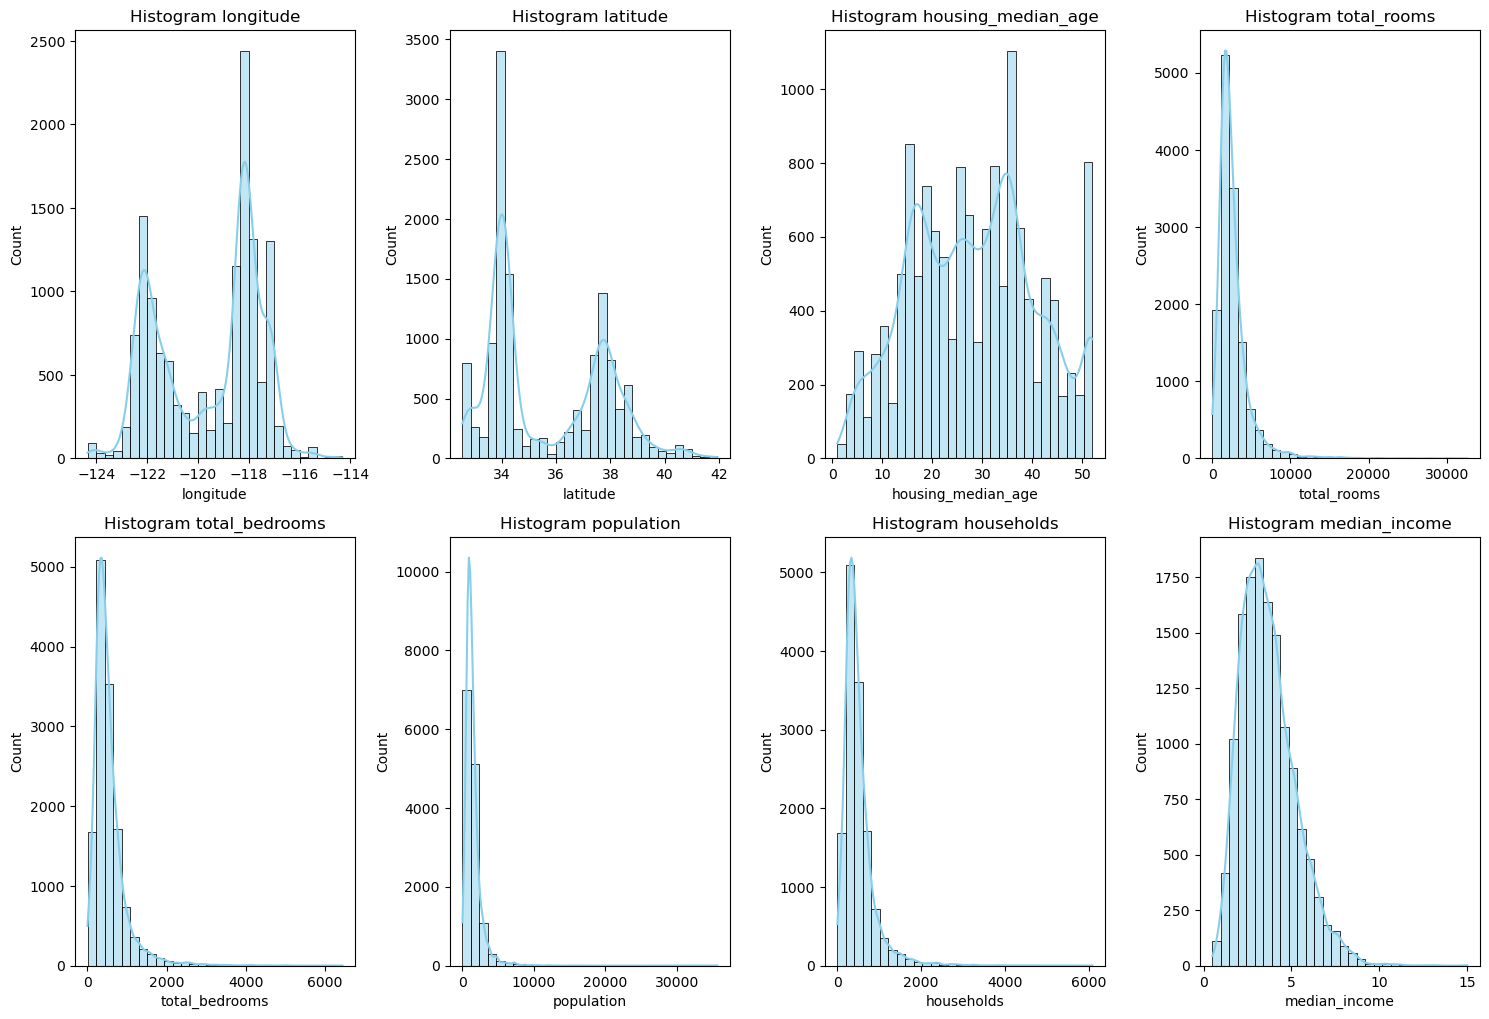

In [14]:
kolom = ['longitude','latitude','housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
plt.figure(figsize=(15, 20))
for i, column in enumerate(kolom, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Dapat dilihat dari fitur-fitur numerik tersebut tidak berdistribusi normal. Distribusi kolom total_rooms, total_bedrooms, population, households, dan median_income skewed ke kanan.

### Outlier
sebelum nya kita sudah melakukan pengecekan data duplikasi dan missing value dan melakukan pengisian missing value tersebut pada tahap ini kita akan melihat kolom numerikal apakah terdapat outliers atau tidak 


In [15]:
for i, el in enumerate(NumerikColumn):
  print(i, el)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 median_house_value


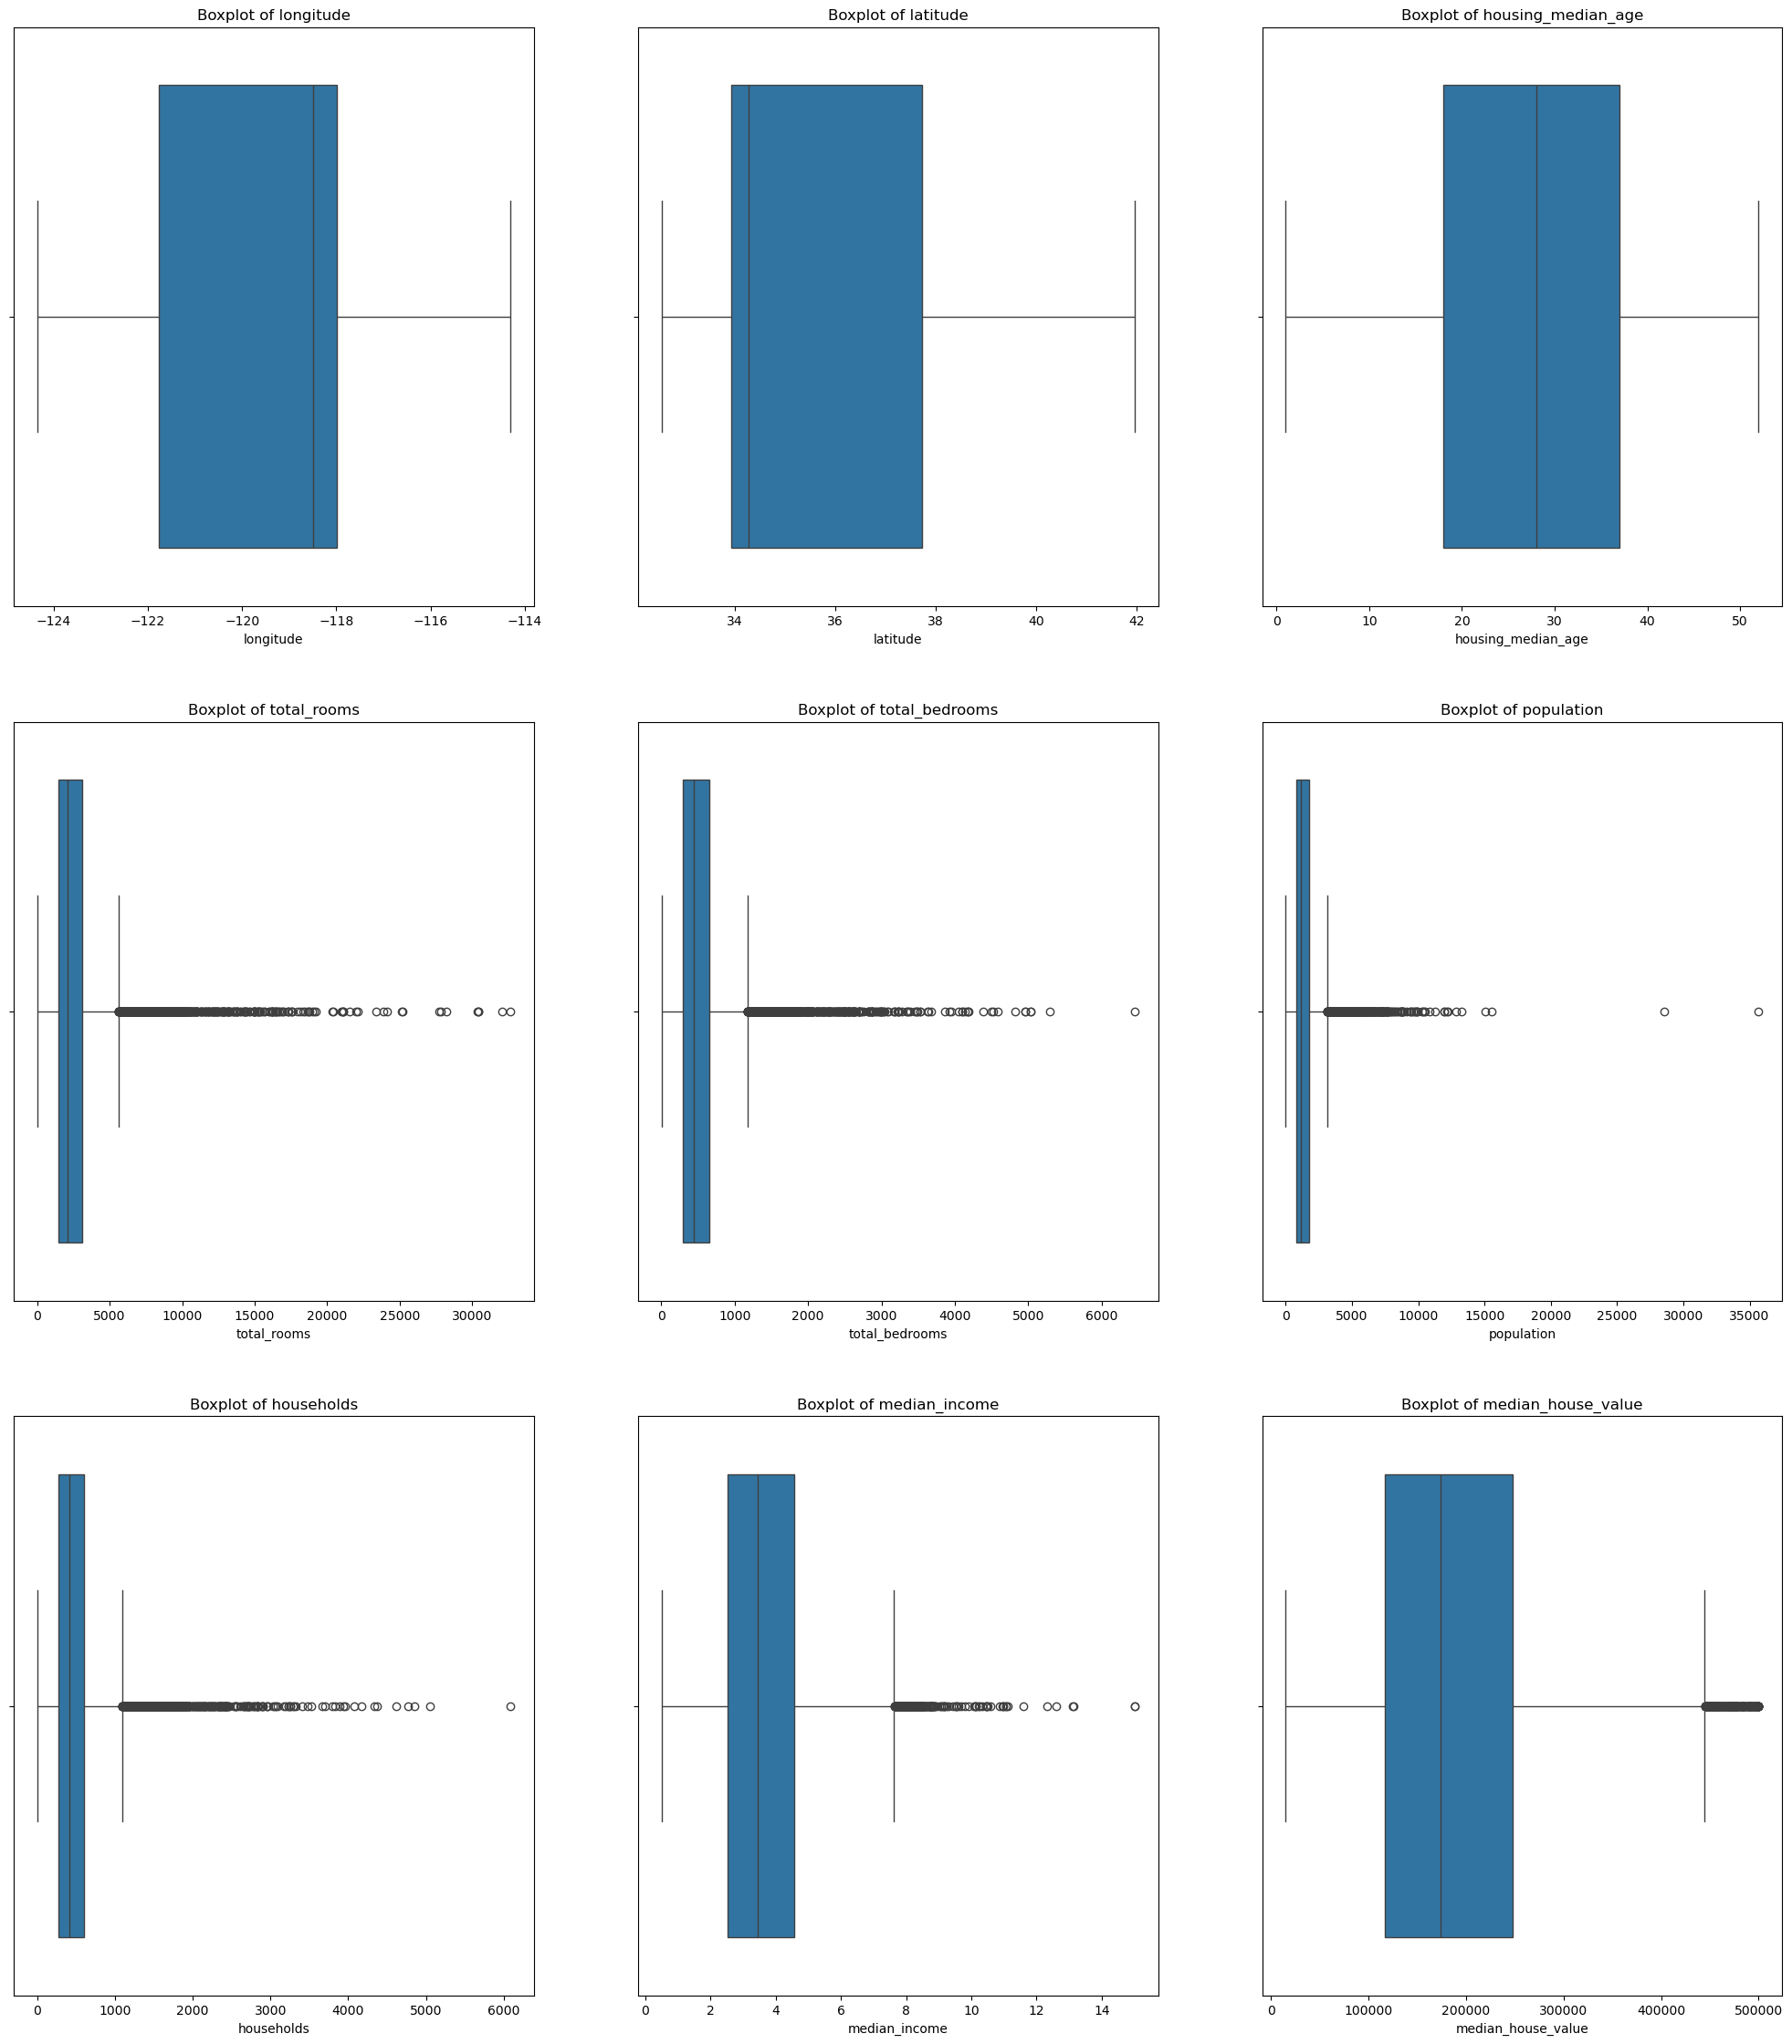

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,28))
for i, col in enumerate(NumerikColumn):
    sns.boxplot(x=df[col], ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Boxplot of {col}')
plt.show()

#### Insight
dapat kita lihat hasil dari Box Plot untuk kolom Numerikal, Bahwa terdapat banyak outliers yang terdapat pada kolom Berikut:

    1. Total_rooms
    2. Total_Bedrooms 
    3. Population 
    4. House hold
    5. Median_Income 
    6. Median_House_Value

dan bila kita lihat juga bahwa terdapat global outliers di beberapa fitur yang ada, Kita akan mencoba untuk mendefinisikan upper bound  pada fitur fitur tersebut. Pada kasus ini kita akan melihat berpaa jumlah data yang berada di atas upper bound.


In [17]:

# Simpan hasil sementara ke list
outlier_data = []

# Loop per kolom numerik
for col in NumerikColumn:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = (df[col] > upper_bound).sum()
    outlier_percentage = (df[col] > upper_bound).sum()/df.shape[0]*100

    outlier_data.append({
        'Feature': col,
        'Upper_Bound': upper_bound,
        'Jumlah Outliers': outlier_count,
        'Persentase Outliers' : outlier_percentage

    })

# Konversi ke DataFrame
outlier_summary = pd.DataFrame(outlier_data)

#Buat mask boolean awal semua False
outlier_mask = pd.Series(False, index=df.index)

# Loop semua kolom numerik untuk flag outlier atas
for col in NumerikColumn:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Update mask untuk baris yang outlier
    outlier_mask |= (df[col] > upper_bound)

# Hitung jumlah dan persentase baris outlier
num_outliers = outlier_mask.sum()
total_rows = len(df)
percent_lost = 100 * num_outliers / total_rows

# Output
print(outlier_summary)
print('\n')
print(f"Jumlah baris yang akan dihapus: {num_outliers} dari {total_rows} baris")
print(f"Persentase data yang akan hilang: {percent_lost:.2f}%")


              Feature   Upper_Bound  Jumlah Outliers  Persentase Outliers
0           longitude    -112.33500                0             0.000000
1            latitude      43.43000                0             0.000000
2  housing_median_age      65.50000                0             0.000000
3         total_rooms    5639.62500              872             6.332607
4      total_bedrooms    1176.00000              848             6.158315
5          population    3167.37500              783             5.686275
6          households    1095.00000              799             5.802469
7       median_income       7.64055              244             1.771968
8  median_house_value  444950.00000              254             1.844590


Jumlah baris yang akan dihapus: 1605 dari 13770 baris
Persentase data yang akan hilang: 11.66%


bisa kita lihat berdasarkan perhitungan bahwa jumlah Outliers sebanyak 11.66%, dan kita akan melakukan penghapusan terhadap nilai outliers tersebut, tatapi hal ini akan membuat kemungkinan kita mendapati informastion loss.

In [18]:
upper_bounds = {
    'total_rooms': 5639.6250,
    'total_bedrooms': 1176.0000,
    'population': 3167.3750,
    'households': 1095.0000,
    'median_income': 7.64055,
    'median_house_value': 444950.0000
}

# Iterasi untuk menghapus outlier berdasarkan upper bound
for feature, bound in upper_bounds.items():
    df = df[df[feature] <= bound]

# Tampilkan jumlah data setelah outlier dihapus
print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")

Jumlah data setelah menghapus outlier: 12165


setelah kita melakukan pembersihan terhadap outliers di dapatkan bahwa data yang bersih berjumlah 12163

# **Feature Selection**
---

Pada bagian ini, akan dilakukan pengapusan salah satu kategori di dalam Fetuare yaitu kategori *Island* dalam fitur *Ocean Proximity* karena diasumsikan **riset ini membatasi analisa hanya untuk ruang lingkup rumah atau properti yang ada di *mainland* atau daratan utama**. Selain itu, *island houses* biasanya adalah mansion atau rumah-rumah mewah dengan harga cukup tinggi sehingga *equation* atau fungsi penentu harga tentunya akan berbeda dengan rumah-rumah di daratan. 

**Source: ‘Island House’ in California?** https://www.sacbee.com/news/nation-world/national/article257973843.html`

In [19]:
display(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     5231
INLAND        4090
NEAR OCEAN    1528
NEAR BAY      1314
ISLAND           2
Name: count, dtype: int64

In [20]:
df = df[df['ocean_proximity'] != 'ISLAND']
display(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     5231
INLAND        4090
NEAR OCEAN    1528
NEAR BAY      1314
Name: count, dtype: int64

<Axes: >

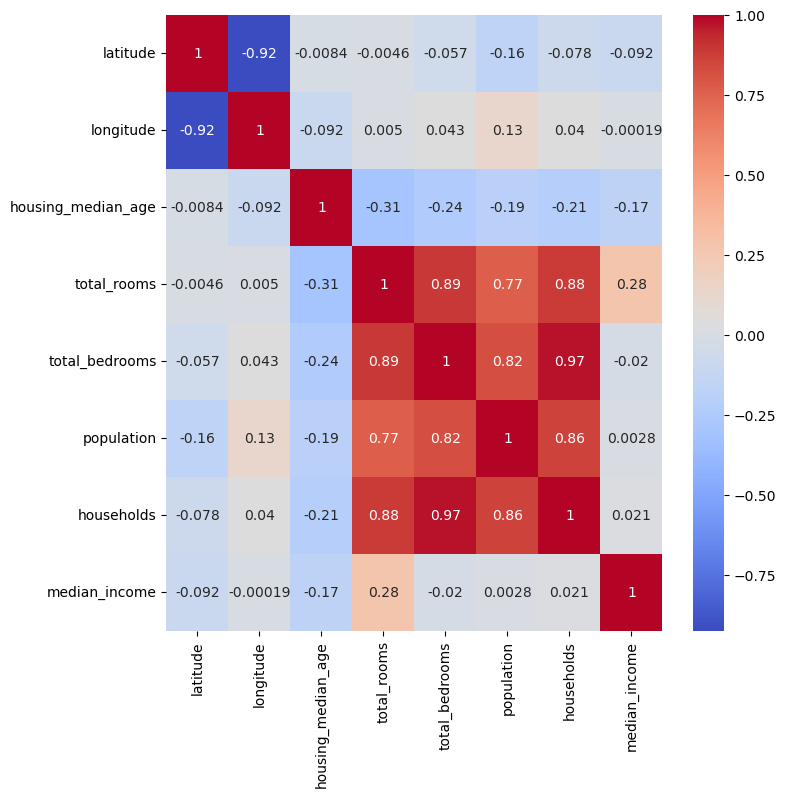

In [21]:
feature = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income' ]
plt.figure(figsize=(8,8))
sns.heatmap(df[feature].corr(), annot = True, cmap ='coolwarm' )

### Insight
Terdapat beberapa fitur yang sangat berkorelasi tinggi satu sama lain (r > 0.8), menunjukkan potensi redundansi:
| Fitur A           | Fitur B           | Nilai Korelasi | Keterangan                 |
|------------------|-------------------|----------------|----------------------------|
| total_bedrooms   | households        | **0.97**       | Sangat mirip              |
| total_bedrooms   | total_rooms       | **0.89**       | Sangat mirip              |
| households       | total_rooms       | **0.88**       | Sangat mirip              |
| population       | households        | **0.86**       | Sangat mirip              |
| population       | total_bedrooms    | **0.82**       | Tinggi                    |                 |

karena ini kita tidak akan mengunakan feature *household* dan *total_bedrooms*

## *Encoding* and *Data Scaler* 

Pada Tahap ini kita akan melakukan *encoding* pada *feature ocean_proximity* mengunakan *ordinal encoder* dan juga akan melakukan proses *scaler* menggunakan *robust scaler* di karenakan *feature* yang kita gunakan tidak berdistribusi normal, dan dalam hal ini kita juga akan buatkan *pipeline* untuk menstandarisasikan proses nya.

In [22]:
df.groupby(by="ocean_proximity")["median_house_value"].mean().sort_values(ascending=False)


ocean_proximity
NEAR BAY      222080.365297
NEAR OCEAN    216314.397906
<1H OCEAN     214321.449054
INLAND        118730.072616
Name: median_house_value, dtype: float64

Untuk fitur ocean_proximity, digunakan metode Ordinal Encoding karena nilai variabel ini secara alami menunjukkan tingkat kedekatan lokasi terhadap laut. Berdasarkan eksplorasi data, terlihat bahwa semakin dekat suatu wilayah ke laut, semakin tinggi pula nilai median harga rumah. Oleh karena itu, urutan kategori pada fitur ini dapat merepresentasikan hubungan monotonic terhadap target (harga rumah), sehingga pendekatan ordinal menjadi metode encoding yang tepat dalam konteks ini.
| Before       | After |
|--------------|-------|
| INLAND       | 0.0   |
| <1H OCEAN    | 1.0   |
| NEAR BAY     | 2.0   |
| NEAR OCEAN   | 3.0   |

Ini penting agar model memahami urutan tersebut sebagai peningkatan atau perubahan makna yang bertahap, bukan kategori acak.

In [23]:
ordinal_cols = ['ocean_proximity']
num_cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                     'population',  'median_income' ]

# ===== Tentukan urutan untuk ordinal encoder (misalnya dari kecil ke besar) =====
ocean_order = [['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN']]  # harus nested list

ordinal_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=ocean_order)),
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('ord', ordinal_pipeline, ordinal_cols),   # encode + scale
    ('num', RobustScaler(), num_cols)          # hanya scale
])

In [ ]:

comparison = pd.DataFrame({
    'Before': df['ocean_proximity'],
    'After': encoded.flatten()
})


filtered = comparison[comparison['Before'].isin(['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN'])]
filtered


,Before,After
0,INLAND,0.0
1,NEAR BAY,2.0
2,<1H OCEAN,1.0
4,INLAND,0.0
7,INLAND,0.0
...,...,...
13764,INLAND,0.0
13765,INLAND,0.0
13766,INLAND,0.0
13767,NEAR OCEAN,3.0


In [24]:
preprocessor

,transformers,"[('ord', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['INLAND', '<1H OCEAN', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


## *Data Split*

Pada tahap ini, kita akan melakukan pembagian data *(data splitting*) untuk keperluan pelatihan model.
Variabel **X** merepresentasikan *features*  yang digunakan sebagai input dalam model, sedangkan variabel **y** merupakan target atau nilai yang ingin kita prediksi menggunakan model machine learning yang dikembangkan.

In [25]:

X = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                     'population',  'median_income', 'ocean_proximity']].copy()
y = df["median_house_value"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2042)


# **Model Bechmarking**
---
Pada tahapan ini dilakukan proses pengujian dan pembandingan performa beberapa algoritma machine learning untuk menentukan model dengan performa terbaik berdasarkan metrik evaluasi yang digunakan.

### Limitasi Model 

berikut merupakan beberapa keterbatasan (limitasi) dari model yang sedang kami kembangkan:

In [26]:

X_train_transformed = preprocessor.fit_transform(X_train)
encoded_ordinal_cols = ordinal_cols
scaled_num_cols = num_cols

transformed_columns = encoded_ordinal_cols + scaled_num_cols
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)

# 4. Tampilkan beberapa baris
X_train_transformed_df.describe()

,ocean_proximity,latitude,longitude,housing_median_age,total_rooms,population,median_income
count,9730.000000,9730.000000,9730.000000,9730.000000,9730.000000,9730.000000,9730.000000
mean,0.018088,0.343991,-0.265937,-0.030768,0.118876,0.109127,0.085700
std,0.972159,0.572937,0.533539,0.641143,0.773372,0.760678,0.721876
min,-1.000000,-0.492105,-1.526596,-1.526316,-1.397492,-1.396226,-1.480293
25%,-1.000000,-0.123684,-0.843085,-0.578947,-0.426982,-0.433962,-0.458309
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.876316,0.156915,0.421053,0.573018,0.566038,0.541691
max,2.000000,1.984211,1.079787,1.157895,2.573548,2.578616,2.193024


## *Train Model*
Pada tahapan ini, model akan dilatih menggunakan data latih dan dievaluasi melalui teknik cross-validation untuk mengukur performa secara lebih akurat dan menghindari overfitting.

In [27]:
# Fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100


# Hasil evaluasi
cv_results = []

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.5),
    'Lasso Regression': Lasso(alpha=0.5),
    'Random Forest': RandomForestRegressor( random_state=2042),
    'XGBoost': XGBRegressor(random_state=4202, verbosity=0)
}

# Hasil evaluasi
cv_results = []

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=2042)

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor), 
        ('regressor', model)
    ])
    
    # Cross val predict untuk semua fold
    y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=kf)
    
    cv_results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'R² Score': r2_score(y_train, y_train_pred),
        'MAPE (%)': mean_absolute_percentage_error(y_train, y_train_pred)
    })

# Tampilkan hasil
df_cv_results = pd.DataFrame(cv_results)
print(df_cv_results)

               Model           MAE  R² Score   MAPE (%)
0  Linear Regression  44182.404918  0.577163  29.368656
1   Ridge Regression  44179.021165  0.577163  29.359542
2   Lasso Regression  44182.162206  0.577163  29.368039
3      Random Forest  29257.179823  0.773561  18.097209
4            XGBoost  28204.041029  0.789026  17.568621


Berdasarkan hasil train model, dapat kita lihat bahwa Random Forest dan XGBoost menunjukkan performa terbaik dibandingkan tiga model lainnya. Hal ini terlihat dari nilai MAE dan R² yang lebih baik, yaitu MAE  yang paling rendah, serta nilai R² yang paling tinggi — menunjukkan bahwa kedua model ini mampu memprediksi harga dengan akurasi yang lebih tinggi.

### Base Model to Predict 

Pada tahapan ini, kita akan melakukan prediksi menggunakan dua model dasar (base model) terbaik yaitu Random Forest dan XGBoost , kemudian membandingkan hasil prediksinya dan akan dilanjutkan ke tahap hyperparameter tuning untuk meningkatkan akurasi prediksi lebih lanjut.

In [28]:

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

# Dictionary model
models = {
    'Random Forest': RandomForestRegressor(random_state=2042),
    'XGBoost': XGBRegressor(random_state=4202, verbosity=0)
}

# List untuk menyimpan hasil evaluasi
model_names = []
mae_scores = []
r2_scores = []
mape_scores = []

# Evaluasi setiap model
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Simpan hasil evaluasi
    model_names.append(name)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))

# Buat DataFrame hasil evaluasi
df_metrics = pd.DataFrame({
    "Model": model_names,
    "MAE": mae_scores,
    "R2 Score": r2_scores,
    "MAPE (%)": mape_scores
})

# Tampilkan hasil
print(df_metrics)

           Model           MAE  R2 Score   MAPE (%)
0  Random Forest  29358.432351  0.767371  18.092424
1        XGBoost  28110.644803  0.786451  17.420576


Berdasarkan hasil evaluasi model, dapat kita lihat bahwa kedua model menunjukkan performa terbaik. Hal ini terlihat dari nilai MAE dan R² yang lebih baik, yaitu MAE paling rendah, serta nilai R² yang paling tinggi, menunjukkan bahwa kedua model ini mampu memprediksi harga dengan akurasi yang lebih tinggi. namun perlu di ingat bahwa hasil score ini adalah hasil score sebelum proses tuning. karena selisih dari score metrics dari kedua model tidak terlalu signifikan maka kita akan lakukan tunning pada kedua model tersebut.

# **Tunning Model**
---

Pada tahapan ini dilakukan proses pengaturan dan optimasi hyperparameter dari model machine learning guna meningkatkan performa prediksi terhadap data yang belum pernah dilihat sebelumnya. Proses tuning dilakukan menggunakan metode Grid Search, yaitu teknik pencarian secara menyeluruh terhadap kombinasi hyperparameter terbaik berdasarkan hasil evaluasi menggunakan cross-validation.

## Hyperparameter Tunning

In [37]:
# Fungsi MAPE (jika belum ada)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

models = {
    "XGBoost": {
        "model": XGBRegressor(random_state=2042, verbosity=0),
        "param_grid": {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [3, 5, 7],
            'regressor__learning_rate': [0.01, 0.1, 0.2],
            'regressor__subsample': [0.8, 1.0]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=2042),
        "param_grid": {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5]
        }
    }
}

# Simpan hasil tuning pada data train
train_results = []

for name, config in models.items():
    print(f"\nTraining Model: {name}")
    
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', config["model"])
    ])
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=config["param_grid"],
        cv=10,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)

    train_results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R²': r2_score(y_train, y_train_pred),
        'Train MAPE (%)': mean_absolute_percentage_error(y_train, y_train_pred)
    })



Training Model: XGBoost
Fitting 10 folds for each of 36 candidates, totalling 360 fits

Training Model: Random Forest
Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [38]:
# Buat DataFrame dari hasil benchmarking
df_train_results = pd.DataFrame(train_results)

# Bulatkan skor (opsional)
df_train_results['Train MAE'] = df_train_results['Train MAE'].round(2)
df_train_results['Train R²'] = df_train_results['Train R²'].round(3)

# Jadikan 'Model' sebagai index
df_train_results.set_index("Model", inplace=True)

# Tampilkan semua kolom param (jika panjang)
pd.set_option('display.max_colwidth', None)

# Cetak hasil
print("\nTrain Performance Benchmark:")
print(df_train_results)


Train Performance Benchmark:
                                                                                                                             Best Params  \
Model                                                                                                                                      
XGBoost        {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}   
Random Forest                          {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}   

               Train MAE  Train R²  Train MAPE (%)  
Model                                               
XGBoost         13856.88     0.953        8.752331  
Random Forest   10584.23     0.970        6.562838  


Berdasarkan hasil tuning model di trainset, bahwa  Random Forest  menunjukkan kenaikan performa lebih tinggi dibandingkan XGBoost . Hal ini terlihat dari nilai MAE dan R² yang lebih baik, yaitu MAE yang paling rendah, serta nilai R² yang paling tinggi, menunjukkan bahwa model ini mampu memprediksi harga dengan akurasi yang lebih tinggi. selanjutkan akan kita lakukan predict menggunakan best parameter yang sudah kita dapatkan. 

## Tunning Model Predict

In [47]:
#Buat ulang pipeline dengan best parameter
best_rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        random_state=2042,
    ))
])

# Fit model ke data training
best_rf_pipeline.fit(X_train, y_train)

# Prediksi pada test set
y_test_pred = best_rf_pipeline.predict(X_test)

# Evaluasi performa
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Tampilkan hasil
print("Performance on Test Set (Tuned Random Forest):")
print(f"Test MAE      : {test_mae:.2f}")
print(f"Test MAPE %   : {test_mape:.2f}")
print(f"Test R² Score : {test_r2:.3f}")

Performance on Test Set (Tuned Random Forest):
Test MAE      : 29268.64
Test MAPE %   : 18.04
Test R² Score : 0.769


Dapat kita lihat bahwa skor performa yang diperoleh dari model Random Forest setelah dilakukan tuning mengalami peningkatan, meskipun tidak terlalu signifikan. Hal ini menunjukkan bahwa pengaturan hyperparameter dapat membantu meningkatkan akurasi model, namun efeknya terbatas jika model awal (base model) sudah cukup optimal. Oleh karena itu, tuning tetap merupakan langkah penting dalam memastikan bahwa model bekerja secara maksimal pada data yang tersedia.

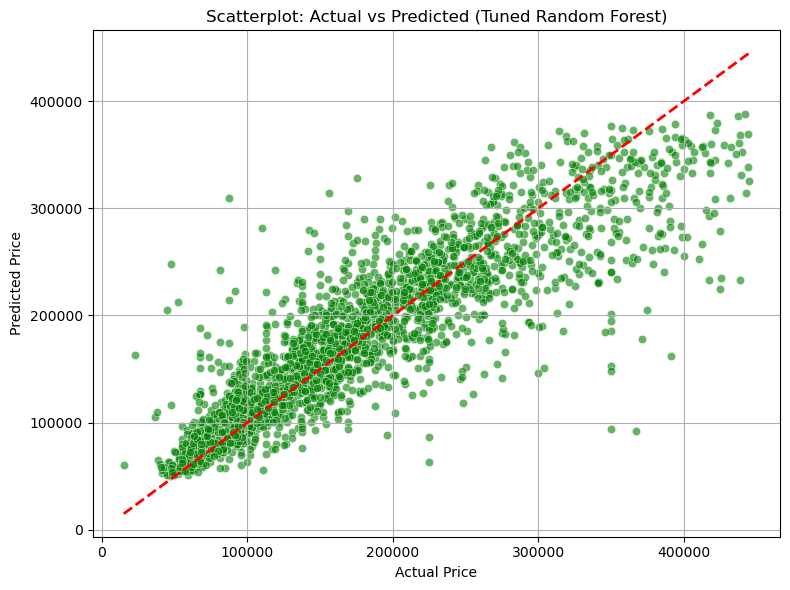

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, color='green')

# Garis prediksi sempurna
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Label dan judul
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Scatterplot: Actual vs Predicted (Tuned Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

pada Grafik Scatterplot di atas menunjukkan hubungan antara harga rumah aktual (sumbu X) dan harga yang diprediksi oleh model Random Forest yang telah dituning (sumbu Y). Garis merah putus-putus merepresentasikan garis ideal di mana nilai prediksi sama persis dengan nilai aktual.

- Kesesuaian Model
Sebagian besar titik tersebar cukup dekat dengan garis diagonal, menandakan bahwa model memiliki performa prediksi yang baik secara umum.

- Pola Penyebaran
Meskipun sebaran data relatif mengikuti arah garis ideal, terdapat deviasi yang lebih besar pada harga rumah yang tinggi. Hal ini menunjukkan bahwa akurasi prediksi menurun pada nilai harga yang lebih tinggi.

- Simetri
Tidak terlihat pola sistematis di atas atau di bawah garis, yang berarti tidak ada bias ekstrem dalam model (misalnya selalu underpredict atau overpredict)


Model Random Forest yang telah dituning menunjukkan performa prediksi yang baik dengan kesalahan relatif kecil pada kisaran harga menengah. Namun, akurasi sedikit menurun pada harga rumah yang sangat tinggi, yang umum terjadi dalam data yang memiliki outlier atau distribusi tidak seimbang.

## Feature Important

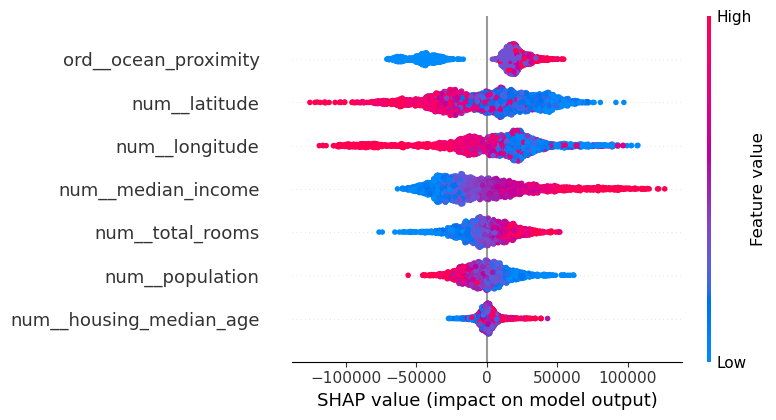

In [41]:
"""#1. Ambil model & preprocessor dari pipeline
model = best_rf_pipeline.named_steps['regressor']
preprocessor = best_rf_pipeline.named_steps['preprocessing']"""

# 2. Transform X_test ke bentuk numerik
X_test_processed = preprocessor.transform(X_test)

# 3. SHAP explainer (gunakan TreeExplainer untuk Random Forest)
explainer = shap.Explainer(model)
shap_values = explainer(X_test_processed)

# 4. Summary plot (global interpretability)
shap.summary_plot(shap_values, X_test_processed, feature_names=preprocessor.get_feature_names_out())

Plot SHAP menjelaskan pengaruh tiap fitur terhadap prediksi harga rumah:

    1. median_income → Fitur paling berpengaruh. Pendapatan tinggi secara konsisten menaikkan prediksi harga rumah.
    2. ocean_proximity → Rumah yang lebih dekat ke laut cenderung bernilai lebih tinggi.
    4. latitude & longitude → Lokasi geografis signifikan; wilayah selatan dan barat California menunjukkan harga rumah lebih tinggi.
    5. housing_median_age → Rumah yang lebih baru memberi kontribusi positif terhadap nilai properti.
    6. total_rooms & population → Dampaknya relatif kecil, namun tetap relevan.
    
Faktor ekonomi (median_income), lokasi geografis (ocean_proximity, latitude, longitude), dan (housing_median_age) menjadi penentu utama dalam prediksi harga rumah oleh model ini.

### Analisis Residual

In [42]:
# Hitung residual
residuals = np.array(y_test) - np.array(y_pred)

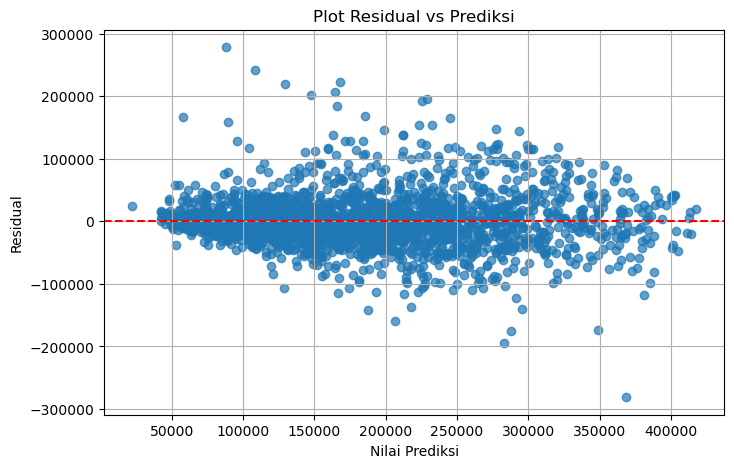

In [43]:
# Plot 1: Scatter plot Prediksi vs Residual
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Plot Residual vs Prediksi")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual")
plt.grid(True)
plt.show()

Dapat kita lihat bersama untuk grafik Scatterplot Residual :
- titik-titik residual tersebar secara acak di sekitar garis horizontal y=0y=0, tanpa pola yang jelas. Hal ini menunjukkan bahwa model memenuhi asumsi homoskedastisitas dan tidak menunjukkan bias sistematis.

- Meskipun terdapat sedikit penyebaran residual yang lebih besar di tengah rentang prediksi (sekitar 200.000–300.000), indikasi heteroskedastisitas tersebut tergolong ringan dan tidak signifikan.

- Secara keseluruhan, penyebaran residual yang acak menandakan bahwa model mampu menangkap pola data dengan baik dan tidak mengalami underfitting maupun overfitting.

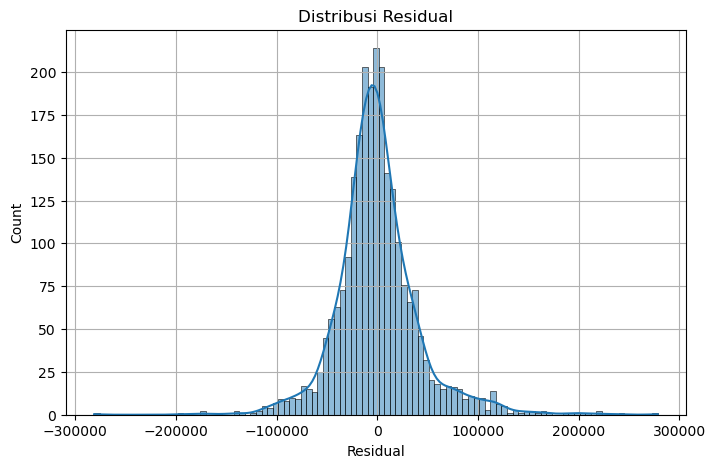

In [44]:
# Plot 2: Histogram Residual
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual")
plt.xlabel("Residual")
plt.grid(True)
plt.show()

Histogram menunjukkan bahwa residual memiliki distribusi simetris dan berpusat di nol, menyerupai distribusi normal. Hal ini menandakan bahwa mayoritas prediksi model memiliki error kecil dan tidak bias. Meskipun terdapat sedikit outlier di kedua sisi, jumlahnya relatif kecil dan tidak memengaruhi distribusi secara keseluruhan. dan dapat di katakan bahwa Distribusi residual yang normal dan acak menunjukkan bahwa model bekerja dengan baik dan stabil, tanpa bias sistematis dalam prediksi.

### **Save Model To Pickle**

Setelah melalui proses pelatihan dan evaluasi terhadap berbagai model, kami telah memperoleh model dengan performa terbaik, yaitu Random Forest yang telah dikustomisasi dalam sebuah pipeline. Model ini menunjukkan hasil evaluasi yang optimal pada data uji dan dianggap paling representatif untuk digunakan dalam prediksi ke depan. Sebagai langkah akhir, model terbaik ini disimpan dalam format pickle (.pkl) agar dapat digunakan kembali tanpa perlu melakukan pelatihan ulang di masa mendatang.

In [66]:

# Tentukan folder dan nama file
save_dir = "models"
file_name = "best_rf_pipeline.pkl"
full_path = os.path.join(save_dir, file_name)

# Buat folder jika belum ada
os.makedirs(save_dir, exist_ok=True)

# Simpan model ke dalam file pickle
with open(full_path, 'wb') as file:
    pickle.dump(best_rf_pipeline, file)

print(f"Model berhasil disimpan di: {full_path}")


Model berhasil disimpan di: models\best_rf_pipeline.pkl


# **Closing Statement**
---

###  **Business Impact**

Model prediksi harga rumah ini memiliki potensi besar untuk diimplementasikan secara luas dalam sektor properti, perbankan, dan teknologi finansial. Dampak yang dihasilkan meliputi:

1. **Transformasi Pengambilan Keputusan**  
   Mengubah proses penetapan harga jual-beli properti dari yang sebelumnya berbasis asumsi menjadi berbasis data yang objektif dan akurat.

2. **Optimasi Lokasi Investasi**  
   Membantu developer dan investor mengidentifikasi lokasi paling prospektif untuk pembangunan perumahan berdasarkan proyeksi nilai properti dan tren lingkungan.

3. **Efisiensi Investasi & ROI Maksimal**  
   Mengarahkan alokasi dana ke wilayah dengan potensi ROI tinggi, mengurangi biaya trial-error, dan meningkatkan margin keuntungan.

4. **Minimasi Risiko Keuangan**  
   Menghindari kerugian akibat kesalahan pricing (overpricing maupun underpricing), baik bagi penjual, pembeli, maupun lembaga pembiayaan.

***

###  **Saran Implementasi Strategis**

Berikut beberapa strategi praktis untuk menerapkan hasil model ke dalam ekosistem nyata:

- **1. Integrasi ke Aplikasi Properti Digital**  
  Bangun fitur *AI-Powered Price Estimator* dalam platform seperti OLX, Rumah.com, Lamudi, atau aplikasi agen properti untuk menarik minat pengguna dan membangun kepercayaan terhadap estimasi harga.

- **2. Dashboard Interaktif untuk Developer & Investor**  
  Tampilkan hasil prediksi harga secara geografis (berbasis latitude–longitude) melalui peta interaktif, heatmap, atau clustering untuk mendukung pengambilan keputusan lokasi pembangunan atau akuisisi tanah.

- **3. Ekspansi Dataset ke Tahun Terkini**  
  Gunakan data properti terbaru (tahun 2020 ke atas) dari Zillow, Redfin, atau Biro Statistik Perumahan AS agar model tetap relevan dengan kondisi pasar terkini dan tidak bias terhadap data historis lama.

- **4. Personalisasi Berdasarkan Preferensi Konsumen**  
  Perluas fitur prediksi berdasarkan variabel seperti: kualitas sekolah sekitar, akses transportasi umum, indeks kriminalitas, hingga keberadaan pusat perbelanjaan — agar cocok dengan kebutuhan konsumen akhir.

- **5. Valuasi Jangka Panjang untuk Lembaga Keuangan**  
  Gunakan model ini sebagai alat bantu perbankan dalam menentukan nilai agunan (*collateral*) properti untuk KPR (Kredit Pemilikan Rumah), serta memprediksi nilai properti dalam horizon 5–10 tahun.

---

###  **Kesimpulan**
Dengan integrasi yang tepat, model prediksi harga rumah ini dapat menjadi alat strategis dalam ekosistem properti digital, memberikan nilai tambah untuk semua pemangku kepentingan: developer, investor, pembeli, platform digital, dan lembaga keuangan.
